Epoch 1/7
1875/1875 [==============================] - 2s 839us/step - loss: 0.5010 - accuracy: 0.8232
Epoch 2/7
1875/1875 [==============================] - 2s 809us/step - loss: 0.3773 - accuracy: 0.8637
Epoch 3/7
1875/1875 [==============================] - 2s 808us/step - loss: 0.3372 - accuracy: 0.8775
Epoch 4/7
1875/1875 [==============================] - 2s 813us/step - loss: 0.3123 - accuracy: 0.8851
Epoch 5/7
1875/1875 [==============================] - 2s 811us/step - loss: 0.2959 - accuracy: 0.8903
Epoch 6/7
1875/1875 [==============================] - 2s 812us/step - loss: 0.2815 - accuracy: 0.8966
Epoch 7/7
1875/1875 [==============================] - 2s 801us/step - loss: 0.2676 - accuracy: 0.9007


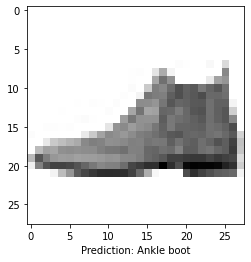

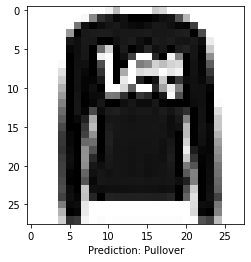

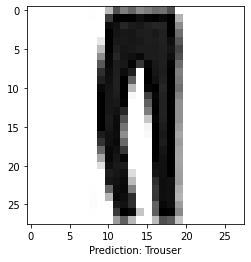

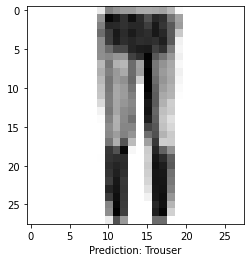

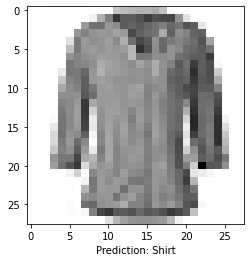

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
# the dataset is here https://www.tensorflow.org/tutorials/keras/classification
# it is a black and white group of basic clothing items

data = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# to get them to a good value for a neural network (-1 to 1) we divide
# them by 255 to get the values to around that range
train_images = train_images/255.0
test_images = test_images/255.0



# shows the image as its array form because each image is just an array of pixels
# print(train_images[7])

# can show a certain image
# plt.imshow(train_images[7], cmap=plt.cm.binary)
# plt.show

# keras.Sequential defines that the following layers are in order of which
# line of which neurons they will be in the network
model = keras.Sequential([
    # flattens data so it can be passed to a neuron as data than a list
    # this defines that we want the first layer to be a flattened verison of
    # a 28 * 28 array that will be passed to it
    keras.layers.Flatten(input_shape=(28, 28)),
    # the hidden layer is 128 neurons and uses the rectify linear unit
    # function which is described in how it works in pycharm
    keras.layers.Dense(128, activation='relu'),
    # this is the output layer which is 10 neurons (we have 10 items of clothing)
    # it takes the function of softmax which isd described in how it works in pycharm
    keras.layers.Dense(10, activation='softmax')
])

# this are optimizers,  a type of loss function and metrics which can be 
# searched up on the internet, you pick the one you use depeding on what works 
# for you, generally you change the first two and possibly the third in trying
# to find the most effecient networtk
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# this fits the data we want to test on and then the epochs are how many times
# the model should see the same image to make a more accurate cycle so with 5
# epochs, the images and lablels will be given to the model 5 times each, this
# is generally changed a lot to see what works best, it may decrease at high epochs
model.fit(train_images, train_labels, epochs=7)

# print the accuracy
# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print('Tested Acc:', test_acc)


prediction = model.predict(test_images)

# this creates a grid for the object and shows the predicted name and greyness value
# of each object along with the acutal name
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel('Actual: ' + class_names[test_labels[i]])
    # np.argmax gets the largest value and finds the index (the largest probability
    # in this case)
    # by linking it ot class_names it will give us the name of the object
    # it thinks that it is instead of the probability of it being the item
    plt.xlabel('Prediction: ' + class_names[np.argmax(prediction[i])])
    plt.show()
    



